# COVID-19 Cases Dataset

Data is taken from https://ourworldindata.org/covid-cases and describes daily new confirmed COVID-19 cases per million people for each country. To download, visit the site and in the bottom right of the first graph, there is a button that says download. Click, and select full data set (csv).

There are a couple interesting questions for this dataset:
1. How does the United States compare against the world average, as well as a select few countries? Comparing all countries may be too much
2. Is there a relationship between new cases and life expetancy, hand-washing facilities, life expectancy, or hospital beds?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read in the data and print summaries (pd.describe()) and column indicies (df.columns)

In [4]:
df = pd.read_csv ('owid-coid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166784,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166785,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166786,ZWE,Africa,Zimbabwe,2022-03-05,239019.0,280.0,459.429,5397.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166787,ZWE,Africa,Zimbabwe,2022-03-06,239209.0,190.0,486.571,5399.0,2.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.637490e+05,1.636090e+05,1.616250e+05,1.458890e+05,145936.000000,143838.000000,162989.000000,162849.000000,160871.000000,145142.000000,...,106342.000000,104883.000000,68759.000000,124004.000000,155698.000000,136631.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.552188e+06,1.160895e+04,1.161472e+04,5.783416e+04,170.978751,172.593306,29699.304718,167.661325,166.616877,511.231201,...,10.627070,32.778506,50.787279,3.027742,73.576066,0.725578,3.761302e+04,9.404336,15.967077,972.197816
std,1.555033e+07,8.457752e+04,8.281271e+04,3.029782e+05,831.636513,816.612569,52449.395497,712.136441,536.112898,786.770125,...,10.558093,13.523948,31.811550,2.450035,7.491502,0.149963,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.017000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,626.131000,0.041000,1.630000,18.625750,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.626000e+04,7.900000e+01,1.072860e+02,7.850000e+02,2.000000,2.429000,4769.698000,11.432000,18.890000,128.689000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,3.006610e+05,1.065000e+03,1.150571e+03,7.324000e+03,20.000000,21.286000,38057.766000,101.386000,121.408000,715.999750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.478822e+08,4.206334e+06,3.444237e+06,6.007317e+06,18020.000000,14689.143000,706541.904000,77691.083000,16052.608000,6329.697000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Directly using the data frame, plot new cases smoothed per million in the entire world over time. Notice the peaks around late 2020, April 2021, August 2021, and early this year. These coincide with the emergence of Alpha and then Delta variants as the cases came in waves on different continents, with the most recent and largest spike likely being attributed to Omicron.

Text(0.5, 1.0, 'New Cases Per Million in the World')

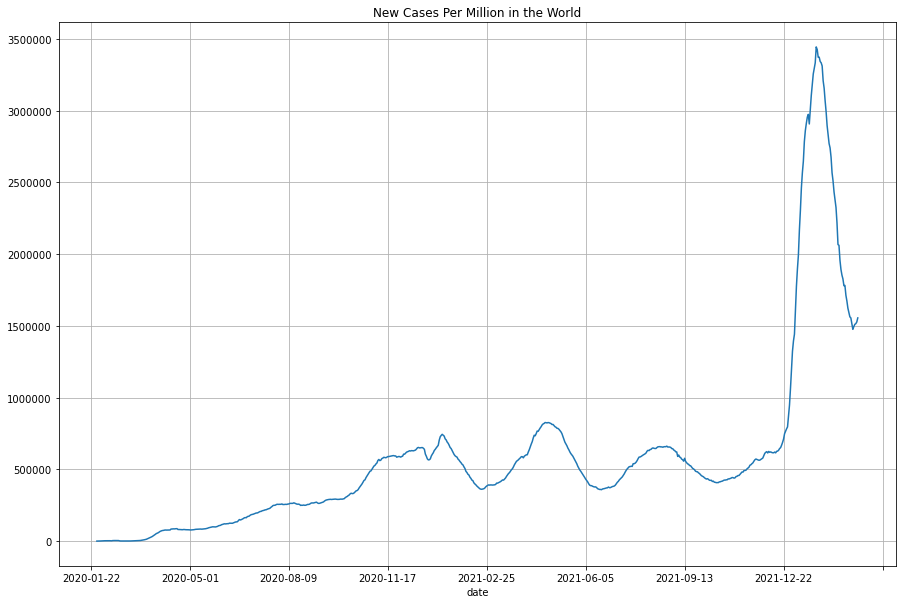

In [34]:
df.groupby('location').get_group('World').plot(x='date',y='new_cases_smoothed',figsize=(15,10),legend=False)
plt.grid()
plt.ticklabel_format(useOffset=False,style='plain',axis='y')
plt.title('New Cases Per Million in the World')

In [6]:
column = 'new_cases_smoothed'

df2 = pd.pivot_table(df, values=column, index=["date"], columns=["location"])
df2

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,717.571,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.286,NaN,801.714,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,1082.857,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,1283.286,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.571,NaN,1514.429,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-03,166.714,6690.000,125.429,75.286,54.857,6.429,3.857,2.000,6150.000,362.429,...,115.286,0.000,0.0,428.000,120589.286,0.0,1494981.571,3.000,182.286,362.286
2022-03-04,161.429,6288.000,127.000,68.571,62.143,13.571,3.857,1.714,5989.286,316.571,...,105.000,0.000,0.0,401.286,134137.286,0.0,1510811.143,2.143,177.000,467.429
2022-03-05,169.286,6357.143,127.000,64.143,62.143,13.571,3.857,2.571,5822.857,257.571,...,95.143,0.000,0.0,323.286,144763.286,0.0,1515746.571,2.143,161.857,459.429
